# Python Basic Data Cleaning

Performing basic Python data cleaning using the Panda and Numpy add-on libraries. I used Kaggle, a favorite playground dataset source, to get some [sample housing data](https://www.kaggle.com/datasets/marcopale/housing) in college town Ames, Iowa. Importing, manipulating and visually showing the data through the use of the dataframe data structure in Pandas.

My Python IDE of choice is Jupyter Notebook because I love how easy it is to have text and markup, images, Python code and visualizations all in one document.

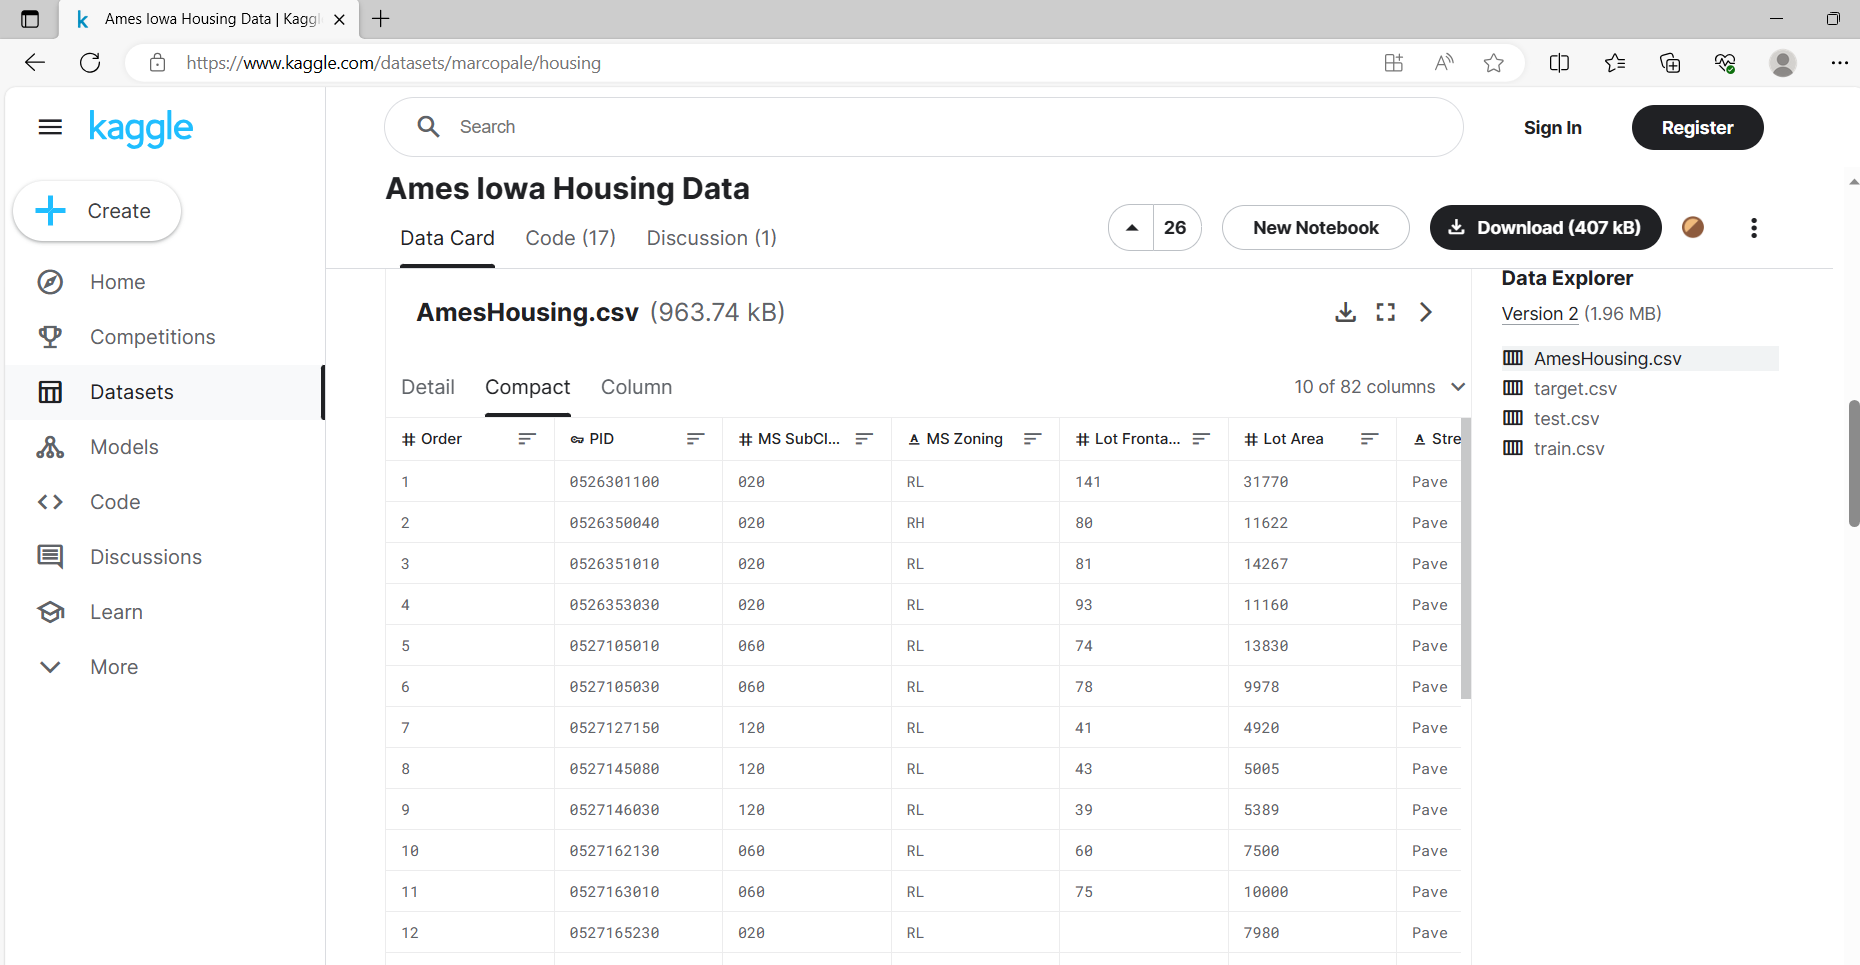

In [17]:
from IPython.core.display import Image
Image(filename='ames-iowa-housing-data.png')

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv(r'C:\Users\user\Downloads\AmesHousing.csv')
df.head() # returns by default first five records in the dataframe, to get a basic feel of the data working with

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
# Get a feel for the total number of rows and columns in the dataframe (data set imported in)
df.shape

(2930, 82)

In [36]:
# Get a feel for all the columns we are working with before removing ones we don't need.
df.columns

Index(['Order', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Foundation', 'Total Bsmt SF', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bedroom AbvGr', 'TotRms AbvGrd', 'Paved Drive', 'Wood Deck SF',
       'Fence', 'Mo Sold', 'Yr Sold', 'Sale Type', 'SalePrice'],
      dtype='object')

In [21]:
# Remove duplicate rows (if any)
df = df.drop_duplicates()

In [22]:
# Remove unnecessary Columns

columns_to_drop = [ 'Street','Alley','Lot Shape','Land Contour', 'Mas Vnr Type','Mas Vnr Area','Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
                   'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating','Heating QC',
                   'Electrical','Functional','Fireplaces','Fireplace Qu' ]
df.drop(columns_to_drop, inplace=True, axis=1)

In [23]:
# Remove additional unnecessary columns in different, more streamlined ways
df = df[df.columns.drop(list(df.filter(regex='Garage')))]
df = df[df.columns.drop(list(df.filter(regex='Kitchen')))]
df = df[df.columns.drop(list(df.filter(regex='Fireplace')))]
df = df.drop(columns=df.filter(like='Porch').columns)
df = df.drop(columns=df.filter(like='Pool').columns)
df = df.drop(columns=df.filter(like='Misc').columns)
df = df.drop(columns=df.filter(like='Roof').columns)
df = df.drop(columns=df.filter(like='Exterior').columns)
df = df.drop(columns=df.filter(like='Bath').columns)
df = df.drop(columns=df.filter(like='Condition').columns)

In [24]:
# Trimmed down to the columns truly would need.
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Utilities,Lot Config,Land Slope,Neighborhood,...,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Paved Drive,Wood Deck SF,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice
0,1,526301100,20,RL,141.0,31770,AllPub,Corner,Gtl,NAmes,...,1656,3,7,P,210,NaN,5,2010,WD,215000
1,2,526350040,20,RH,80.0,11622,AllPub,Inside,Gtl,NAmes,...,896,2,5,Y,140,MnPrv,6,2010,WD,105000
2,3,526351010,20,RL,81.0,14267,AllPub,Corner,Gtl,NAmes,...,1329,3,6,Y,393,NaN,6,2010,WD,172000
3,4,526353030,20,RL,93.0,11160,AllPub,Corner,Gtl,NAMES,...,2110,3,8,Y,0,NaN,4,2010,WD,244000
4,5,527105010,60,RL,74.0,13830,AllPub,Inside,Gtl,...Gilbert,...,1629,3,6,Y,212,MnPrv,3,2010,WD,189900


In [25]:
# Made the Parcel ID (PID) the index, makes for a more appropriate lookup column than the arbitary Order.
# No duplicate values or properties so not worried about removing duplicate rows from the data.
df = df.set_index('PID')


In [26]:
# Increase the number of rows .head() displays (5 by default) so can get better representation of the data.
df.head(20)

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Utilities,Lot Config,Land Slope,Neighborhood,Bldg Type,...,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Paved Drive,Wood Deck SF,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,1,20,RL,141.0,31770,AllPub,Corner,Gtl,NAmes,1Fam,...,1656,3,7,P,210,NaN,5,2010,WD,215000
526350040,2,20,RH,80.0,11622,AllPub,Inside,Gtl,NAmes,1Fam,...,896,2,5,Y,140,MnPrv,6,2010,WD,105000
526351010,3,20,RL,81.0,14267,AllPub,Corner,Gtl,NAmes,1Fam,...,1329,3,6,Y,393,NaN,6,2010,WD,172000
526353030,4,20,RL,93.0,11160,AllPub,Corner,Gtl,NAMES,1Fam,...,2110,3,8,Y,0,NaN,4,2010,WD,244000
527105010,5,60,RL,74.0,13830,AllPub,Inside,Gtl,...Gilbert,1Fam,...,1629,3,6,Y,212,MnPrv,3,2010,WD,189900
527105030,6,60,RL,78.0,9978,AllPub,Inside,Gtl,Gilbert,1Fam,...,1604,3,7,Y,360,NaN,6,2010,WD,195500
527127150,7,120,RL,41.0,4920,AllPub,Inside,Gtl,StoneBr_,TwnhsE,...,1338,2,6,Y,0,NaN,4,2010,WD,213500
527145080,8,120,RL,43.0,5005,AllPub,Inside,Gtl,StoneBr_,TwnhsE,...,1280,2,5,Y,0,NaN,1,2010,WD,191500
527146030,9,120,RL,39.0,5389,AllPub,Inside,Gtl,StoneBr_,TwnhsE,...,1616,2,5,Y,237,NaN,3,2010,WD,236500


In [27]:
# Need to cleanup the parcel neighborhood column/data. First going to remove white spaces at beginning or end.
df["Neighborhood"] = df["Neighborhood"].str.strip()

# Strip() by default removes white spaces if it has no parameters. Now going to remove all the other unnecessary characters.
df["Neighborhood"] = df["Neighborhood"].str.strip("1234567890./_")

# Neighborhood also contains NAMES in some cases instead of NAmes, it has more than one capital and lower case,
# so instead of using lower() or upper() will just do a replace()
df["Neighborhood"] = df["Neighborhood"].str.replace('NAMES', 'NAmes')
df.head(20)

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Utilities,Lot Config,Land Slope,Neighborhood,Bldg Type,...,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Paved Drive,Wood Deck SF,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,1,20,RL,141.0,31770,AllPub,Corner,Gtl,NAmes,1Fam,...,1656,3,7,P,210,NaN,5,2010,WD,215000
526350040,2,20,RH,80.0,11622,AllPub,Inside,Gtl,NAmes,1Fam,...,896,2,5,Y,140,MnPrv,6,2010,WD,105000
526351010,3,20,RL,81.0,14267,AllPub,Corner,Gtl,NAmes,1Fam,...,1329,3,6,Y,393,NaN,6,2010,WD,172000
526353030,4,20,RL,93.0,11160,AllPub,Corner,Gtl,NAmes,1Fam,...,2110,3,8,Y,0,NaN,4,2010,WD,244000
527105010,5,60,RL,74.0,13830,AllPub,Inside,Gtl,Gilbert,1Fam,...,1629,3,6,Y,212,MnPrv,3,2010,WD,189900
527105030,6,60,RL,78.0,9978,AllPub,Inside,Gtl,Gilbert,1Fam,...,1604,3,7,Y,360,NaN,6,2010,WD,195500
527127150,7,120,RL,41.0,4920,AllPub,Inside,Gtl,StoneBr,TwnhsE,...,1338,2,6,Y,0,NaN,4,2010,WD,213500
527145080,8,120,RL,43.0,5005,AllPub,Inside,Gtl,StoneBr,TwnhsE,...,1280,2,5,Y,0,NaN,1,2010,WD,191500
527146030,9,120,RL,39.0,5389,AllPub,Inside,Gtl,StoneBr,TwnhsE,...,1616,2,5,Y,237,NaN,3,2010,WD,236500


In [33]:
# Get values used in various columns (and number of times they occur) so know what needs to be renamed 
# using the replace function below.
df["Bldg Type"].value_counts()

Single Family      2425
Townhouse Extra     233
Duplex              109
Townhouse           101
Two Family           62
Name: Bldg Type, dtype: int64

In [34]:
df["Fence"].value_counts()

MnPrv    330
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [35]:
# Use String replace to make the columns more friendly, readable. We will address properties that don't have a fence,
# NaN further down.
df["Paved Drive"] = df["Paved Drive"].replace({'Y': 'Yes', 'P': 'Partial', 'N': 'No'})
df["Bldg Type"] = df["Bldg Type"].replace({'1Fam': 'Single Family', 'TwnhsE': 'Townhouse Extra',
                                           '2fmCon': 'Two Family', 'Twnhs': 'Townhouse'})
df["Fence"] = df["Fence"].replace({'MnPrv': 'Checkered', 'GdPrv': 'Vertical',
                                           'GdWo': 'Wired', 'MnWw': 'White Wood'})
df.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Utilities,Lot Config,Land Slope,Neighborhood,Bldg Type,...,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Paved Drive,Wood Deck SF,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,1,20,RL,141.0,31770,AllPub,Corner,Gtl,NAmes,Single Family,...,1656,3,7,Partial,210,NaN,5,2010,WD,215000
526350040,2,20,RH,80.0,11622,AllPub,Inside,Gtl,NAmes,Single Family,...,896,2,5,Yes,140,Checkered,6,2010,WD,105000
526351010,3,20,RL,81.0,14267,AllPub,Corner,Gtl,NAmes,Single Family,...,1329,3,6,Yes,393,NaN,6,2010,WD,172000
526353030,4,20,RL,93.0,11160,AllPub,Corner,Gtl,NAmes,Single Family,...,2110,3,8,Yes,0,NaN,4,2010,WD,244000
527105010,5,60,RL,74.0,13830,AllPub,Inside,Gtl,Gilbert,Single Family,...,1629,3,6,Yes,212,Checkered,3,2010,WD,189900


In [44]:
# Now lookup the information for a specific Parcel via the Loc function.
df.loc[526301100]

Order                    1
MS SubClass             20
MS Zoning               RL
Lot Frontage         141.0
Lot Area             31770
Utilities           AllPub
Lot Config          Corner
Land Slope             Gtl
Neighborhood         NAmes
Bldg Type             1Fam
House Style         1Story
Overall Qual             6
Overall Cond             5
Year Built            1960
Year Remod/Add        1960
Foundation          CBlock
Total Bsmt SF       1080.0
Central Air              Y
1st Flr SF            1656
2nd Flr SF               0
Low Qual Fin SF          0
Gr Liv Area           1656
Bedroom AbvGr            3
TotRms AbvGrd            7
Paved Drive        Partial
Wood Deck SF           210
Fence                  NaN
Mo Sold                  5
Yr Sold               2010
Sale Type              WD 
SalePrice           215000
Name: 526301100, dtype: object

In [45]:
# Columns are good, now want to only work with properties in two Ames area neighborhoods.
df = df.loc[(df.Neighborhood == 'NWAmes' ) | (df.Neighborhood == 'OldTown' ) ]

In [48]:
df

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Utilities,Lot Config,Land Slope,Neighborhood,Bldg Type,...,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Paved Drive,Wood Deck SF,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
527302110,20,20,RL,85.0,13175,AllPub,Inside,Gtl,NWAmes,1Fam,...,2073,3,7,Yes,349,MnPrv,2,2010,WD,210000
527358140,21,20,RL,105.0,11751,AllPub,Inside,Gtl,NWAmes,1Fam,...,1844,3,7,Yes,0,MnPrv,1,2010,COD,190000
527358200,22,85,RL,85.0,10625,AllPub,Inside,Gtl,NWAmes,1Fam,...,1173,3,6,Yes,0,MnPrv,1,2010,WD,170000
534129040,111,20,RL,NaN,10456,AllPub,Inside,Gtl,NWAmes,1Fam,...,1829,4,8,Yes,0,NaN,5,2010,WD,218500
534151175,112,60,RL,80.0,10791,AllPub,Inside,Gtl,NWAmes,1Fam,...,2495,4,9,Yes,224,NaN,3,2010,WD,243500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903229040,2675,190,RM,65.0,7800,AllPub,Inside,Gtl,OldTown,2fmCon,...,1118,3,5,Yes,0,MnPrv,5,2006,WD,119900
903234030,2683,30,RM,50.0,6000,AllPub,Inside,Gtl,OldTown,1Fam,...,1103,2,5,Yes,166,MnPrv,7,2006,WD,110500
903425190,2687,50,RM,90.0,33120,AllPub,Inside,Gtl,OldTown,1Fam,...,2486,5,8,Yes,0,NaN,10,2006,WD,220000


In [49]:
# Checkout Data types, Pandas guesses the data type for each column based on the first x number of rows.
df.dtypes

Order                int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Foundation          object
Total Bsmt SF      float64
Central Air         object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bedroom AbvGr        int64
TotRms AbvGrd        int64
Paved Drive         object
Wood Deck SF         int64
Fence               object
Mo Sold              int64
Yr Sold              int64
Sale Type           object
SalePrice            int64
dtype: object

In [50]:
# After analyzing data types we determine we Want to work with only whole numbers, so converted the floats to ints.
df['Lot Frontage'] = df['Lot Frontage'].fillna(0) 
df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0) 
df = df.astype({"Lot Frontage": np.int64, "Total Bsmt SF": np.int64}) 
df.dtypes

Order               int64
MS SubClass         int64
MS Zoning          object
Lot Frontage        int64
Lot Area            int64
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Foundation         object
Total Bsmt SF       int64
Central Air        object
1st Flr SF          int64
2nd Flr SF          int64
Low Qual Fin SF     int64
Gr Liv Area         int64
Bedroom AbvGr       int64
TotRms AbvGrd       int64
Paved Drive        object
Wood Deck SF        int64
Fence              object
Mo Sold             int64
Yr Sold             int64
Sale Type          object
SalePrice           int64
dtype: object

In [51]:
# Check for Missing Data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Order - 0.0%
MS SubClass - 0.0%
MS Zoning - 0.0%
Lot Frontage - 0.0%
Lot Area - 0.0%
Utilities - 0.0%
Lot Config - 0.0%
Land Slope - 0.0%
Neighborhood - 0.0%
Bldg Type - 0.0%
House Style - 0.0%
Overall Qual - 0.0%
Overall Cond - 0.0%
Year Built - 0.0%
Year Remod/Add - 0.0%
Foundation - 0.0%
Total Bsmt SF - 0.0%
Central Air - 0.0%
1st Flr SF - 0.0%
2nd Flr SF - 0.0%
Low Qual Fin SF - 0.0%
Gr Liv Area - 0.0%
Bedroom AbvGr - 0.0%
TotRms AbvGrd - 0.0%
Paved Drive - 0.0%
Wood Deck SF - 0.0%
Fence - 0.7378378378378379%
Mo Sold - 0.0%
Yr Sold - 0.0%
Sale Type - 0.0%
SalePrice - 0.0%


In [52]:
# Removing rows, movies with missing data. Only want to look at parcels, properties with all the data points.
# Only going to look at properties that have a fence.
df = df.dropna()

In [53]:
# Re-check for Missing Data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Order - 0.0%
MS SubClass - 0.0%
MS Zoning - 0.0%
Lot Frontage - 0.0%
Lot Area - 0.0%
Utilities - 0.0%
Lot Config - 0.0%
Land Slope - 0.0%
Neighborhood - 0.0%
Bldg Type - 0.0%
House Style - 0.0%
Overall Qual - 0.0%
Overall Cond - 0.0%
Year Built - 0.0%
Year Remod/Add - 0.0%
Foundation - 0.0%
Total Bsmt SF - 0.0%
Central Air - 0.0%
1st Flr SF - 0.0%
2nd Flr SF - 0.0%
Low Qual Fin SF - 0.0%
Gr Liv Area - 0.0%
Bedroom AbvGr - 0.0%
TotRms AbvGrd - 0.0%
Paved Drive - 0.0%
Wood Deck SF - 0.0%
Fence - 0.0%
Mo Sold - 0.0%
Yr Sold - 0.0%
Sale Type - 0.0%
SalePrice - 0.0%


In [54]:
# Search, replace, display full neighborhood names
#df['Neighborhood'] = df['Neighborhood'].replace('NWAmes', 'Northwest Ames')
#df['Neighborhood'] = df['Neighborhood'].replace('OldTown', 'Old Town')
df.replace('OldTown', 'Old Town')
df.replace('NWAmes', 'Northwest Ames')

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Utilities,Lot Config,Land Slope,Neighborhood,Bldg Type,...,Gr Liv Area,Bedroom AbvGr,TotRms AbvGrd,Paved Drive,Wood Deck SF,Fence,Mo Sold,Yr Sold,Sale Type,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
527302110,20,20,RL,85,13175,AllPub,Inside,Gtl,Northwest Ames,1Fam,...,2073,3,7,Yes,349,MnPrv,2,2010,WD,210000
527358140,21,20,RL,105,11751,AllPub,Inside,Gtl,Northwest Ames,1Fam,...,1844,3,7,Yes,0,MnPrv,1,2010,COD,190000
527358200,22,85,RL,85,10625,AllPub,Inside,Gtl,Northwest Ames,1Fam,...,1173,3,6,Yes,0,MnPrv,1,2010,WD,170000
534152100,115,60,RL,80,10421,AllPub,Inside,Gtl,Northwest Ames,1Fam,...,1714,3,7,Yes,228,MnPrv,3,2010,WD,196500
534176230,117,60,RL,80,9600,AllPub,Inside,Gtl,Northwest Ames,1Fam,...,1645,4,7,Yes,0,GdWo,6,2010,WD,171000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902204120,2653,50,RM,50,6000,AllPub,Inside,Gtl,OldTown,1Fam,...,1566,5,7,Yes,24,MnPrv,8,2006,WD,139000
902206090,2655,50,RM,56,9576,AllPub,Inside,Gtl,OldTown,1Fam,...,1182,3,5,Yes,0,GdWo,5,2006,WD,120000
902400110,2667,75,RM,90,22950,AllPub,Inside,Gtl,OldTown,1Fam,...,3608,4,12,Yes,0,GdPrv,6,2006,WD,475000


In [55]:
# Convert columns to lower case, replacing spaces with underscores.
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '-')

In [56]:
df

,order,ms-subclass,ms-zoning,lot-frontage,lot-area,utilities,lot-config,land-slope,neighborhood,bldg-type,...,gr-liv-area,bedroom-abvgr,totrms-abvgrd,paved-drive,wood-deck-sf,fence,mo-sold,yr-sold,sale-type,saleprice
PID,,,,,,,,,,,,,,,,,,,,,
527302110,20,20,RL,85,13175,AllPub,Inside,Gtl,NWAmes,1Fam,...,2073,3,7,Yes,349,MnPrv,2,2010,WD,210000
527358140,21,20,RL,105,11751,AllPub,Inside,Gtl,NWAmes,1Fam,...,1844,3,7,Yes,0,MnPrv,1,2010,COD,190000
527358200,22,85,RL,85,10625,AllPub,Inside,Gtl,NWAmes,1Fam,...,1173,3,6,Yes,0,MnPrv,1,2010,WD,170000
534152100,115,60,RL,80,10421,AllPub,Inside,Gtl,NWAmes,1Fam,...,1714,3,7,Yes,228,MnPrv,3,2010,WD,196500
534176230,117,60,RL,80,9600,AllPub,Inside,Gtl,NWAmes,1Fam,...,1645,4,7,Yes,0,GdWo,6,2010,WD,171000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902204120,2653,50,RM,50,6000,AllPub,Inside,Gtl,OldTown,1Fam,...,1566,5,7,Yes,24,MnPrv,8,2006,WD,139000
902206090,2655,50,RM,56,9576,AllPub,Inside,Gtl,OldTown,1Fam,...,1182,3,5,Yes,0,GdWo,5,2006,WD,120000
902400110,2667,75,RM,90,22950,AllPub,Inside,Gtl,OldTown,1Fam,...,3608,4,12,Yes,0,GdPrv,6,2006,WD,475000


Done with cleaning the dataset, it's time to start querying, playing with the data and building visualizations.